In [50]:
!pip install Pydrive

In [51]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

In [52]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd

In [55]:
df_fake = pd.read_csv('/content/Fake.csv')

In [56]:
df_true = pd.read_csv('/content/True.csv')

In [57]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [58]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [59]:
df_fake.count()

,0
title,23481
text,23481
subject,23481
date,23481


In [60]:
df_true.count()

,0
title,21417
text,21417
subject,21417
date,21417


In [61]:
# finding missing data if any at all
def missing_data(data):
  total = len(data)
  for col in data.columns:
    if data[col].isnull().sum() != 0:
      print("{} has: {:,} ({:.2}%) missing values.".format(column, data[col].isna().sum(),
                                                         (data[col].isna().sum()/total)*100))
    else:
      print("{} has no any missing value".format(col))
  print("\nMissing Value Summary\n{}".format("-"*35))
  print("\ndf db\n{}".format("-"*15))
  print(data.isnull().sum(axis=0))

In [62]:
def remove_duplicates(data):
        print("\nCleaning Summary\n{}".format("-"*35))
        size_before = len(data)
        data.drop_duplicates (subset=None, keep="first", inplace=True)
        size_after = len(data)
        print("... removed {} duplicate rows in db data".format(size_before-size_after))



In [63]:
missing_data(df_fake)

title has no any missing value
text has no any missing value
subject has no any missing value
date has no any missing value

Missing Value Summary
-----------------------------------

df db
---------------
title      0
text       0
subject    0
date       0
dtype: int64


In [64]:
remove_duplicates(df_fake)


Cleaning Summary
-----------------------------------
... removed 3 duplicate rows in db data


In [65]:
missing_data(df_true)

title has no any missing value
text has no any missing value
subject has no any missing value
date has no any missing value

Missing Value Summary
-----------------------------------

df db
---------------
title      0
text       0
subject    0
date       0
dtype: int64


In [66]:
remove_duplicates(df_true)


Cleaning Summary
-----------------------------------
... removed 206 duplicate rows in db data


In [67]:
df_merged = pd.merge(df_fake, df_true, how='outer')

<Axes: xlabel='subject', ylabel='count'>

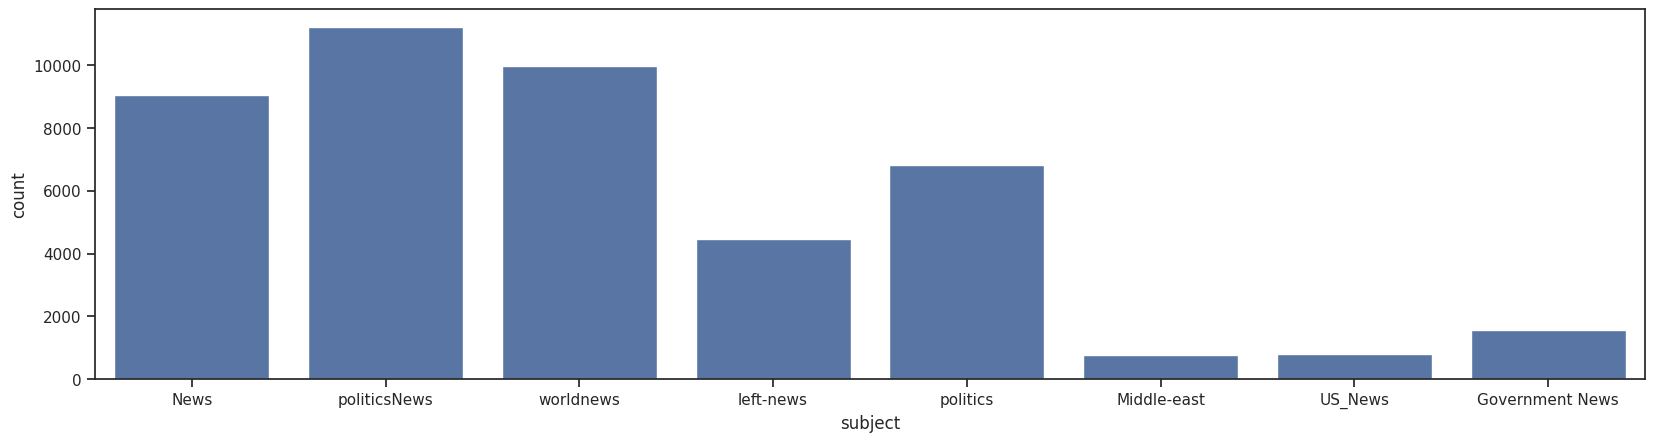

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks",color_codes=True)

fig_dims = (20,4.8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='subject', data=df_merged,ax=ax)

In [69]:
df_fake['Label'] = 0
df_true['Label'] = 1

In [70]:
df_train = pd.merge(df_fake, df_true, how='outer')

In [71]:
!pip install scikit-learn

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
def text_process(text):
  no_punctuation = [char for char in text if char not in string.punctuation]
  no_punctuation = ''.join(no_punctuation)
  return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

Model Creation and Training

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_train ['title'],df_train['Label'], test_size = 0.2, random_state=42)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

# Define the pipeline
news_classifier = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=text_process)),  # Text vectorization
    ('tfidf', TfidfTransformer()),  # Convert to TF-IDF features
    ('classifier', MLPClassifier(
        solver='adam',  # Optimizer
        activation='tanh',  # Activation function
        random_state=1,  # Reproducibility
        max_iter=200,  # Maximum iterations
        early_stopping=True  # Stop early if no improvement
    ))
])

# Fit the pipeline to the training data
news_classifier.fit(X_train, y_train)


Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function text_process at 0x7d01dd923d00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(activation='tanh', early_stopping=True,
                               random_state=1))])

In [78]:
predictions = news_classifier.predict(X_test)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4786
           1       1.00      1.00      1.00      4152

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



In [81]:
news_title = ['Man has now landed on Mars']
prediction = news_classifier.predict(news_title)
print(prediction)

[0]
